# Applying CLIP model

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import clip
import torch
from torchvision.datasets import CIFAR100
import torchvision.transforms as T
from keras.preprocessing import image
#from torchvision.datasets import CocoDetection
import numpy as np
import PIL
%matplotlib inline

#Had OpenMPI issue
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.


## First test with constellation image

In [2]:
preprocess = T.Compose(
    [
        T.Resize(32),
        T.ToTensor(),
    ]
)

In [3]:
# Load constellations
from dataUtils import * 
pictures = loadConstellations(pictureTypes=["original", "final_easy", "outline"], pictureSize=(800, 800))

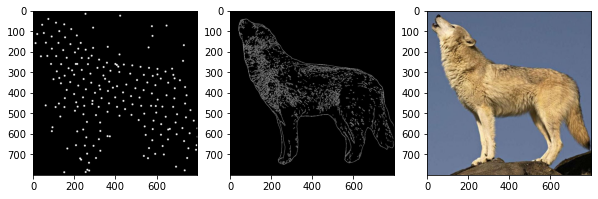

In [4]:
### Visualize selected image and its original
imageIdx = 2
objectId = list(pictures.keys())[imageIdx]
constellationImage = pictures[objectId]["final_easy"][0]
outlineImage = pictures[objectId]["outline"][0]
originalImage = pictures[objectId]["original"][0]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
ax1.imshow(constellationImage)
ax2.imshow(outlineImage)
ax3.imshow(originalImage)

In [5]:
transformedConstellations = transformConstellations(pictures, preprocess)

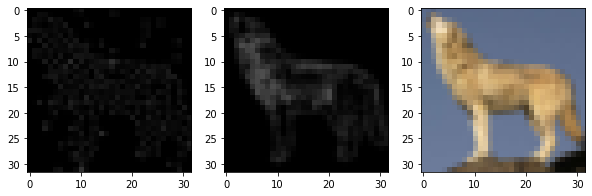

In [6]:
### Visualize selected image and its original
imageIdx = 2
objectId = list(pictures.keys())[imageIdx]
constellationImage = transformedConstellations[objectId]["final_easy"][0]
outlineImage = transformedConstellations[objectId]["outline"][0]
originalImage = transformedConstellations[objectId]["original"][0]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
ax1.imshow(constellationImage)
ax2.imshow(outlineImage)
ax3.imshow(originalImage)

### Load the model

In [7]:

device = "cuda" if torch.cuda.is_available() else "cpu"
#Different architectures, choose one
model, preprocess = clip.load('ViT-B/32', device) #Faster
#model, preprocess = clip.load('RN50x4', device) #Better but takes more time


In [8]:
# Download the dataset (not necessary, as only interested in classes)
#cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)
#Coco = CocoDetection(root=os.path.expanduser("~/.cache"), download=True, train=False)

In [9]:
#Available classifications from different datasets
#combinedClasses.txt - CoCo + CIFAR100 (around 160 classes, removed duplicates)
#combinedClassesAdditional.txt -CoCo + CIFAR100 + classes about pictures which constellations are in set but 
#not in either CoCo or CIFAR100 classes (around 180 classes, removed duplicates)
#cocoClasses.txt - CoCo (80 classes)
#cifarClasses.txt - Cifar100 (100 classes)
#imagenet_classes.txt - Imagenet classes (around 1000 classes)

chosenDataset = "combinedClassesAdditional.txt"
# Read the categories
with open(os.path.join("classes",chosenDataset), "r") as f:
    categories = [s.strip() for s in f.readlines()]

object_196


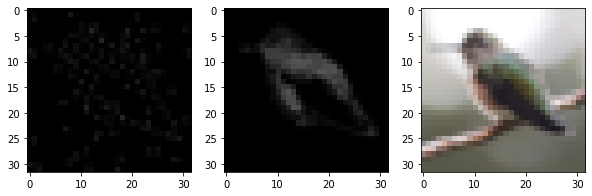

final_easy

Top predictions for final_easy :

        flatfish: 8.29%
           shrew: 3.31%
            bird: 1.96%
        dinosaur: 1.95%
           whale: 1.74%
outline

Top predictions for outline :

        flatfish: 17.08%
           shark: 6.04%
           whale: 5.51%
        dinosaur: 3.99%
         dolphin: 3.85%
original

Top predictions for original :

            bird: 6.27%
          person: 4.65%
      skateboard: 4.45%
             boy: 3.59%
            girl: 3.56%
object_201


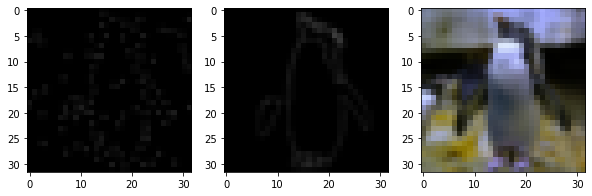

final_easy

Top predictions for final_easy :

          person: 3.64%
           plain: 3.38%
   tennis racket: 2.00%
       pine_tree: 1.69%
           plate: 1.67%
outline

Top predictions for outline :

         penguin: 62.21%
           whale: 2.30%
           skunk: 1.82%
        dinosaur: 1.74%
         giraffe: 1.23%
original

Top predictions for original :

         penguin: 91.53%
           skunk: 1.24%
            bird: 1.05%
            duck: 0.83%
          person: 0.40%
object_206


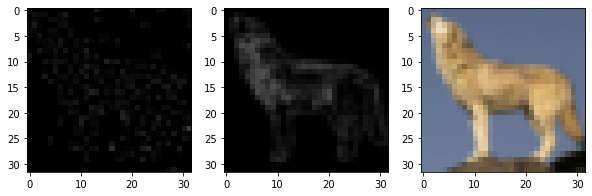

final_easy

Top predictions for final_easy :

          cattle: 3.90%
      chimpanzee: 3.79%
        dinosaur: 3.04%
         giraffe: 2.95%
        elephant: 2.90%
outline

Top predictions for outline :

            wolf: 70.90%
             cat: 6.46%
             dog: 4.94%
             fox: 4.82%
         raccoon: 2.00%
original

Top predictions for original :

            wolf: 44.40%
             fox: 21.13%
             dog: 12.17%
            lion: 8.18%
        kangaroo: 4.40%
object_211


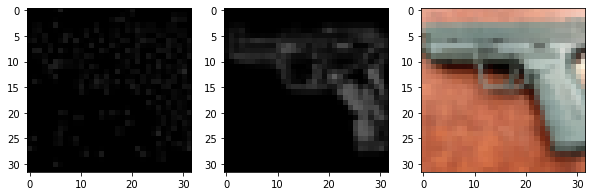

final_easy

Top predictions for final_easy :

           plain: 2.38%
   tennis racket: 2.17%
        flatfish: 2.16%
       pine_tree: 1.97%
      cell phone: 1.76%
outline

Top predictions for outline :

          pistol: 88.42%
          wrench: 2.17%
    sweet_pepper: 0.43%
           knife: 0.40%
      lawn_mower: 0.37%
original

Top predictions for original :

          pistol: 98.46%
    sweet_pepper: 0.24%
      teddy bear: 0.14%
           knife: 0.11%
           plain: 0.11%
object_225


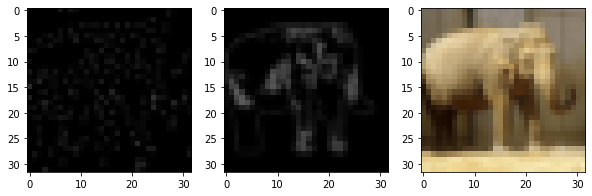

final_easy

Top predictions for final_easy :

   tennis racket: 2.33%
           plain: 2.32%
       pine_tree: 2.29%
            fork: 1.80%
        flatfish: 1.72%
outline

Top predictions for outline :

        elephant: 89.20%
      chimpanzee: 3.87%
           camel: 0.66%
         giraffe: 0.56%
            bear: 0.43%
original

Top predictions for original :

        elephant: 92.65%
           camel: 2.05%
         giraffe: 0.55%
            lion: 0.44%
      lawn_mower: 0.34%
object_229


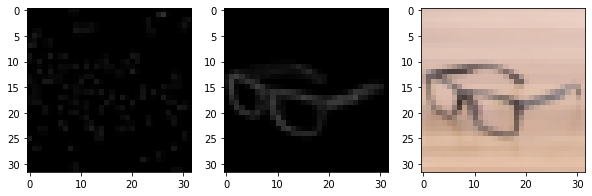

final_easy

Top predictions for final_easy :

       pine_tree: 2.99%
           plain: 2.51%
      chimpanzee: 2.36%
        flatfish: 2.33%
        oak_tree: 2.17%
outline

Top predictions for outline :

      sunglasses: 24.89%
   tennis racket: 4.49%
            worm: 3.59%
           snake: 3.54%
          wrench: 3.12%
original

Top predictions for original :

      sunglasses: 97.48%
           plain: 0.15%
   tennis racket: 0.13%
          person: 0.11%
          laptop: 0.10%
object_230


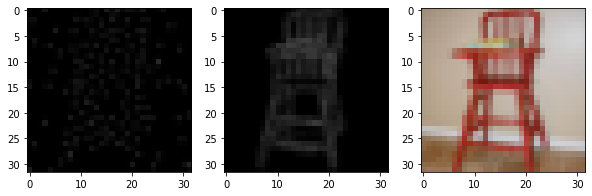

final_easy

Top predictions for final_easy :

          person: 3.27%
      chimpanzee: 2.50%
          beaker: 2.33%
           plain: 2.27%
       pine_tree: 2.23%
outline

Top predictions for outline :

           chair: 90.25%
    dining table: 0.99%
           bench: 0.51%
            lamp: 0.48%
        wardrobe: 0.47%
original

Top predictions for original :

           chair: 60.75%
    dining table: 22.30%
           table: 9.53%
fire extinguisher: 1.89%
            lamp: 0.60%
object_234


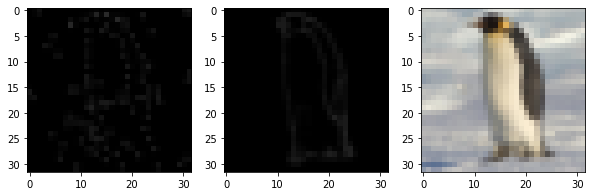

final_easy

Top predictions for final_easy :

           plain: 3.74%
          person: 2.92%
      chimpanzee: 1.84%
       pine_tree: 1.83%
          beaker: 1.71%
outline

Top predictions for outline :

        flatfish: 4.68%
         penguin: 4.28%
            worm: 3.58%
  baseball glove: 3.27%
          wrench: 2.74%
original

Top predictions for original :

         penguin: 94.53%
            bird: 0.88%
            seal: 0.35%
           plain: 0.28%
         snowman: 0.27%
object_243


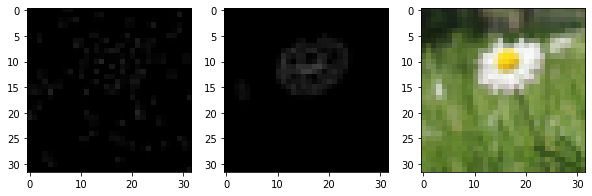

final_easy

Top predictions for final_easy :

           plain: 2.79%
        flatfish: 2.70%
       pine_tree: 2.52%
      chimpanzee: 2.44%
        oak_tree: 1.99%
outline

Top predictions for outline :

           plain: 4.91%
     sports ball: 4.90%
   tennis racket: 3.32%
      chimpanzee: 3.03%
          wrench: 2.09%
original

Top predictions for original :

      lawn_mower: 30.66%
          flower: 17.42%
       sunflower: 15.88%
           plain: 7.13%
           tulip: 2.15%
object_244


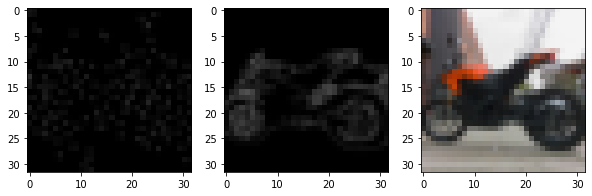

final_easy

Top predictions for final_easy :

        flatfish: 3.51%
   tennis racket: 2.91%
    baseball bat: 2.72%
  baseball glove: 2.33%
           plain: 2.26%
outline

Top predictions for outline :

      motorcycle: 65.60%
      lawn_mower: 20.15%
         bicycle: 1.45%
             car: 0.99%
          beetle: 0.86%
original

Top predictions for original :

      lawn_mower: 89.57%
      motorcycle: 4.19%
            baby: 1.13%
         bicycle: 0.77%
         tractor: 0.62%
object_248


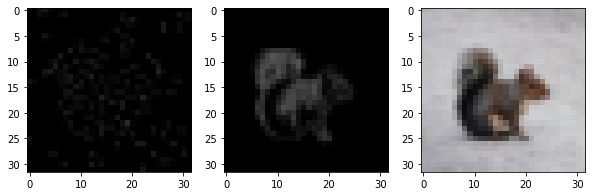

final_easy

Top predictions for final_easy :

        flatfish: 2.86%
      chimpanzee: 2.63%
       pine_tree: 2.49%
        oak_tree: 1.83%
           plain: 1.69%
outline

Top predictions for outline :

        elephant: 8.70%
        seahorse: 7.28%
      chimpanzee: 7.06%
           horse: 6.10%
           skunk: 5.29%
original

Top predictions for original :

        squirrel: 79.70%
           skunk: 4.47%
    sweet_pepper: 2.31%
           shrew: 1.35%
           mouse: 1.21%
object_256


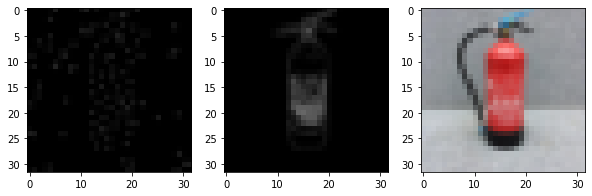

final_easy

Top predictions for final_easy :

           plain: 3.01%
        flatfish: 2.29%
   tennis racket: 2.12%
       pine_tree: 2.11%
          person: 2.06%
outline

Top predictions for outline :

          bottle: 40.86%
fire extinguisher: 10.30%
            vase: 6.94%
          beaker: 3.25%
      wine glass: 2.25%
original

Top predictions for original :

fire extinguisher: 99.56%
          bottle: 0.20%
    fire hydrant: 0.12%
           flask: 0.02%
            vase: 0.02%
object_263


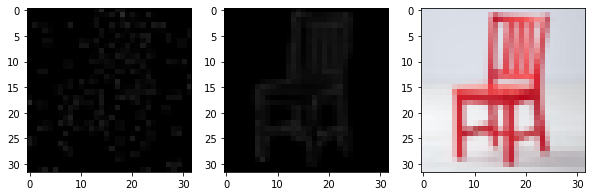

final_easy

Top predictions for final_easy :

       pine_tree: 3.72%
     willow_tree: 2.93%
        oak_tree: 2.68%
      chimpanzee: 2.32%
           plain: 2.15%
outline

Top predictions for outline :

           chair: 95.97%
    dining table: 0.45%
           table: 0.21%
          person: 0.20%
          beaker: 0.19%
original

Top predictions for original :

           chair: 97.10%
    dining table: 0.73%
           table: 0.71%
           bench: 0.13%
             cup: 0.09%
object_266


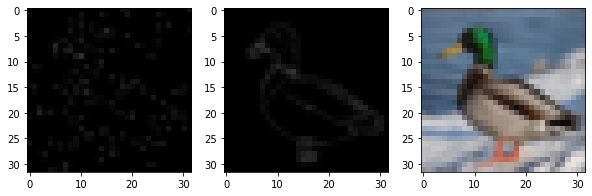

final_easy

Top predictions for final_easy :

        flatfish: 3.08%
      chimpanzee: 2.68%
   tennis racket: 2.30%
           plain: 2.16%
           shrew: 1.97%
outline

Top predictions for outline :

            bird: 35.81%
            duck: 29.73%
         penguin: 12.55%
           plain: 1.30%
         snowman: 1.09%
original

Top predictions for original :

            duck: 77.32%
            bird: 10.80%
      lawn_mower: 1.77%
         penguin: 1.55%
    sweet_pepper: 0.80%
object_322


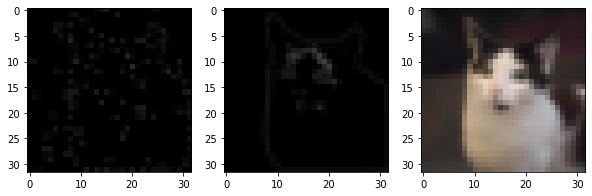

final_easy


In [ ]:
# Prepare the inputs
#image, class_id = cifar100[3637]
n = len(transformedConstellations.keys())

for i in range(n):
    objectId = list(transformedConstellations.keys())[i]
    constellationImage = transformedConstellations[objectId]["final_easy"][-1]
    outlineImage = transformedConstellations[objectId]["outline"][0]
    originalImage = transformedConstellations[objectId]["original"][0]
    print(objectId)
    #print(labels[i])
    #print(labels[i] in categories)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
    axes[0].imshow(constellationImage)
    axes[1].imshow(outlineImage)
    axes[2].imshow(originalImage)
    plt.show()

    for image_type in ["final_easy","outline", "original"]:
        print(image_type)

#    for image_type in ["outline", "final_easy"]:

        image = PIL.Image.fromarray(transformedConstellations[objectId][image_type][0])
        image_input = preprocess(image).unsqueeze(0).to(device)
        text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in categories]).to(device)

        # Calculate features
        with torch.no_grad():
            image_features = model.encode_image(image_input)
            text_features = model.encode_text(text_inputs)

        # Pick the top 5 most similar labels for the image
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        values, indices = similarity[0].topk(5)

        # Print the result
        print("\nTop predictions for", image_type, ":\n")
        for value, index in zip(values, indices):
            print(f"{categories[index]:>16s}: {100 * value.item():.2f}%")
            
   

